In [304]:
import pandas as pd
%matplotlib inline
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
df=pd.read_csv('/Users/laurakim/Downloads/sentiment labelled sentences/yelp_labelled.txt', delimiter='\t')
df.columns=['comment','score']
df

,comment,score
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0
5,Honeslty it didn't taste THAT fresh.),0
6,The potatoes were like rubber and you could te...,0
7,The fries were great too.,1
8,A great touch.,1
9,Service was very prompt.,1


In [306]:
#True- negative feedback
#False- positive feedback
df['score']=(df['score']==0)

In [315]:
keywords=['awful','disappointed','disgusted','bad','terrible','not good','don\'t','do not','stop','avoid','never','did not','didn\'t','worst','wasn\'t','was not','isn\'t','is not','not','no','angry','mad', 'suck','wait','dry','expensive','money','rude','refuse','speak','slow','told','paid','poor','incompetent','problem','overpriced','stale','tasteless','bland','sour','inedible','rancid','dirty','rubber','nasty','flop','disgusting','cold','else','lost','horrible','waste','wasted','undercooked','bad service']

In [316]:
for key in keywords:
    df[str(key)]=df.comment.str.contains(' ' + str(key) + ' ', case=False)

In [317]:
df['upper case']=df.comment.str.isupper()

In [318]:
df

,comment,score,awful,disappointed,disgusted,bad,terrible,not good,don't,do not,...,wasted,undercooked,bad service,upper case,stale,tasteless,bland,sour,inedible,rancid
0,Crust is not good.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Now I am getting angry and I want my damn pho.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Honeslty it didn't taste THAT fresh.),True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,The potatoes were like rubber and you could te...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,The fries were great too.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,A great touch.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,Service was very prompt.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


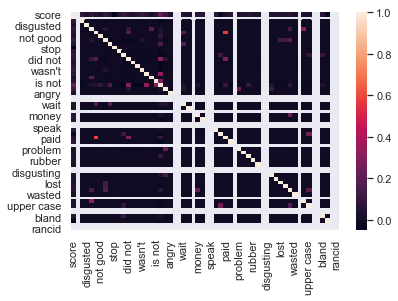

In [319]:
sns.set()
sns.heatmap(df.corr())

In [320]:
data=df[keywords + ['upper case']]
target=df['score']

In [321]:
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()

bnb.fit(data, target)

y_pred=bnb.predict(data)


print("Number of mislabeled points out of a total {} points : {}".format(
    df.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 306


In [322]:
df.shape

(999, 59)